In [54]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.integrate import quad
from scipy.integrate import quad
from sympy import *
from sympy.abc import x
np.random.seed(210187)
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('../../mphil.mplstyle')

In [40]:
def acept_reject(x_o, x_f, function, N):
    X=[]
    cdf=[]
    f_max = max([function(x,alpha,beta) for x in np.linspace(x_o,x_f,N*100)])
    np.random.seed(29072000)
    for i in range(N):
        x = np.random.uniform(x_o,x_f)
        
        b = np.random.uniform(0,f_max)
        y = function(x,alpha,beta)

        if b <= y:
            cdf.append(b)
            X.append(x)
    
    return X

In [41]:
def function(x,alpha,beta):
    a=x_o
    b=x_f
    return (1+alpha*x+beta*x**2)/(b-a+(alpha/2)*(b**2-a**2)+(beta/3)*(b**3-a**3))

In [42]:
x_o=-1;x_f=1;N=100000;function=function; alpha = 0.1; beta=0.2
X = acept_reject(x_o, x_f,  function, N)

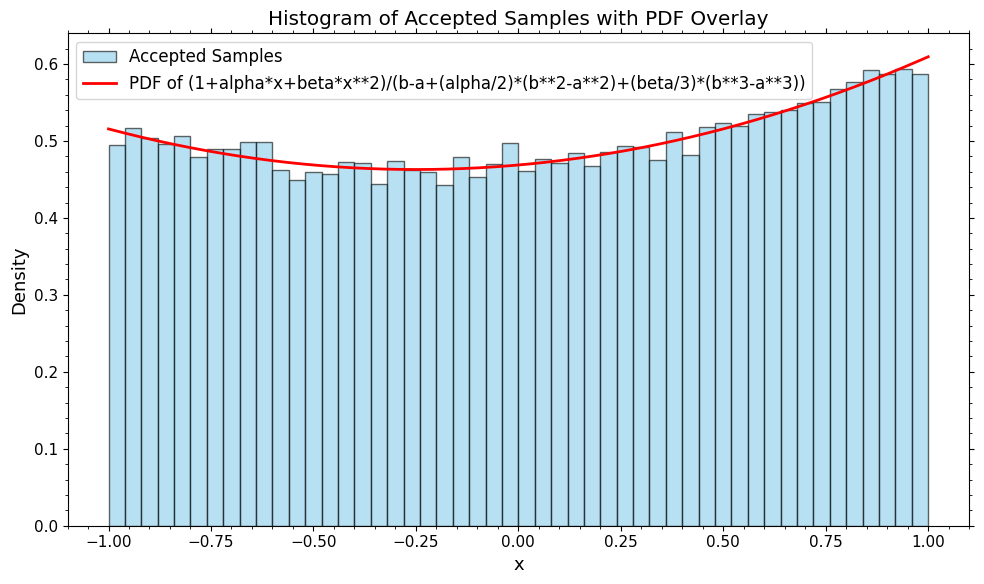

In [43]:
# Generar el histograma con la PDF superpuesta
plt.figure(figsize=(10, 6))

# Histograma de las muestras aceptadas
plt.hist(X, bins=50, density=True, color="skyblue", edgecolor="black", alpha=0.6, label="Accepted Samples")

# Valores de x para graficar la PDF teórica
x_vals = np.linspace(x_o, x_f, N)
pdf_vals = function(x_vals,alpha,beta)
result, error = quad(function, x_o, x_f,args=(alpha, beta))
plt.plot(x_vals, pdf_vals, color="red", linewidth=2, label="PDF of (1+alpha*x+beta*x**2)/(b-a+(alpha/2)*(b**2-a**2)+(beta/3)*(b**3-a**3))")  # Normalización
#/result

# Etiquetas y título
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Accepted Samples with PDF Overlay")
plt.legend()
plt.show()

## Section d

In [44]:
def d_k(a,b,k):
    return (1/k)*(b**k-a**k)

In [45]:
def MLE(X):
    a = min(X)
    b = max(X)
    mu_1 = np.mean(X)
    mu_2 = 0
    for i,val in enumerate(X):
        mu_2 = mu_2 + val**2

    mu_2 = mu_2/len(X)

    A =  (mu_2*d_k(a,b,2)-mu_1*d_k(a,b,3))/(mu_1*d_k(a,b,4)-mu_2*d_k(a,b,3))
    C =  (mu_1*d_k(a,b,5)-mu_2*d_k(a,b,4))/(mu_1*d_k(a,b,4)-mu_2*d_k(a,b,3))
    bet = (d_k(a,b,2)-mu_1*d_k(a,b,1)-A*(mu_1*d_k(a,b,2)-d_k(a,b,3)))/(mu_1*d_k(a,b,3)-d_k(a,b,4)-C*mu_1*d_k(a,b,2)+C*d_k(a,b,3))
    alfa = A - C*bet
    return bet, alfa


In [46]:
bet, alfa = MLE(X)
alfa, bet

(np.float64(0.09989639767590909), np.float64(0.20014315434974161))

### ML method

In [47]:
def ML(X,function):
    # log-likelihood function
    cost = UnbinnedNLL(X , function)

    # ML with Minuit
    m = Minuit(cost, alpha=0.5, beta=0.5)
    m.limits["alpha"] = (0, np.inf)
    m.limits["beta"] = (0, np.inf)
    m.migrad()  # Finding minimiun
    m.hesse()   # calculatin errors

    # Results
    print(f"Estimated alpha: {m.values['alpha']} +-{m.errors['alpha']}")
    print(f"Estimated beta: {m.values['beta']} +-{m.errors['beta']}")

In [48]:
ML(X,function)

Estimated alpha: 0.10002193483724464 +-0.0066314249801394665
Estimated beta: 0.2009533541901518 +-0.013549197740929997


## Section f

In [49]:
data =np.load('mom_data.npy')

In [50]:
maximum=max(data)
minimum=min(data)

In [51]:
def function2(x,alpha,beta):
    a=min(data)
    b=max(data)
    return (1+alpha*x+beta*x**2)/(b-a+(alpha/2)*(b**2-a**2)+(beta/3)*(b**3-a**3))

In [52]:
ML(data,function2)

Estimated alpha: 0.5262573895937848 +-0.05372523848528388
Estimated beta: 0.5414012726867727 +-0.11227125581327346


In [53]:
MLE(data)

(np.float64(0.502766179401581), np.float64(0.5106942439548469))